# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [ ]:
#read the data

#data_path = ''  #the path where you downloaded the data
df = pd.read_csv('CC GENERAL.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# feel free to investigate what you want

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Customer ID Column with object type, it will be dropped (not crucial for the model)           <br>
2-  null values in CREDIT_LIMIT         <br>
3- null values in MINIMUM_PAYMENTS      
4- Data Skewness    <br>


In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

In [ ]:
df_copy

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**First issue**

In [ ]:
#solution
df_copy= df_copy. drop('CUST_ID', axis=1)

In [ ]:
#test
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**Second issue**

In [ ]:
#solution
df_copy= df_copy.dropna()

In [ ]:
#test
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df_copy.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

***⚛   TSNE on Original Data***

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1234)
X_tsne = tsne.fit_transform(df_copy)
tsne.kl_divergence_

1.2290796041488647

In [ ]:
import plotly.express as px

fig = px.scatter( x=X_tsne[:, 0], y= X_tsne[:, 1])
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [ ]:
from sklearn import preprocessing

In [ ]:
# using log transformer because of Data Skewness

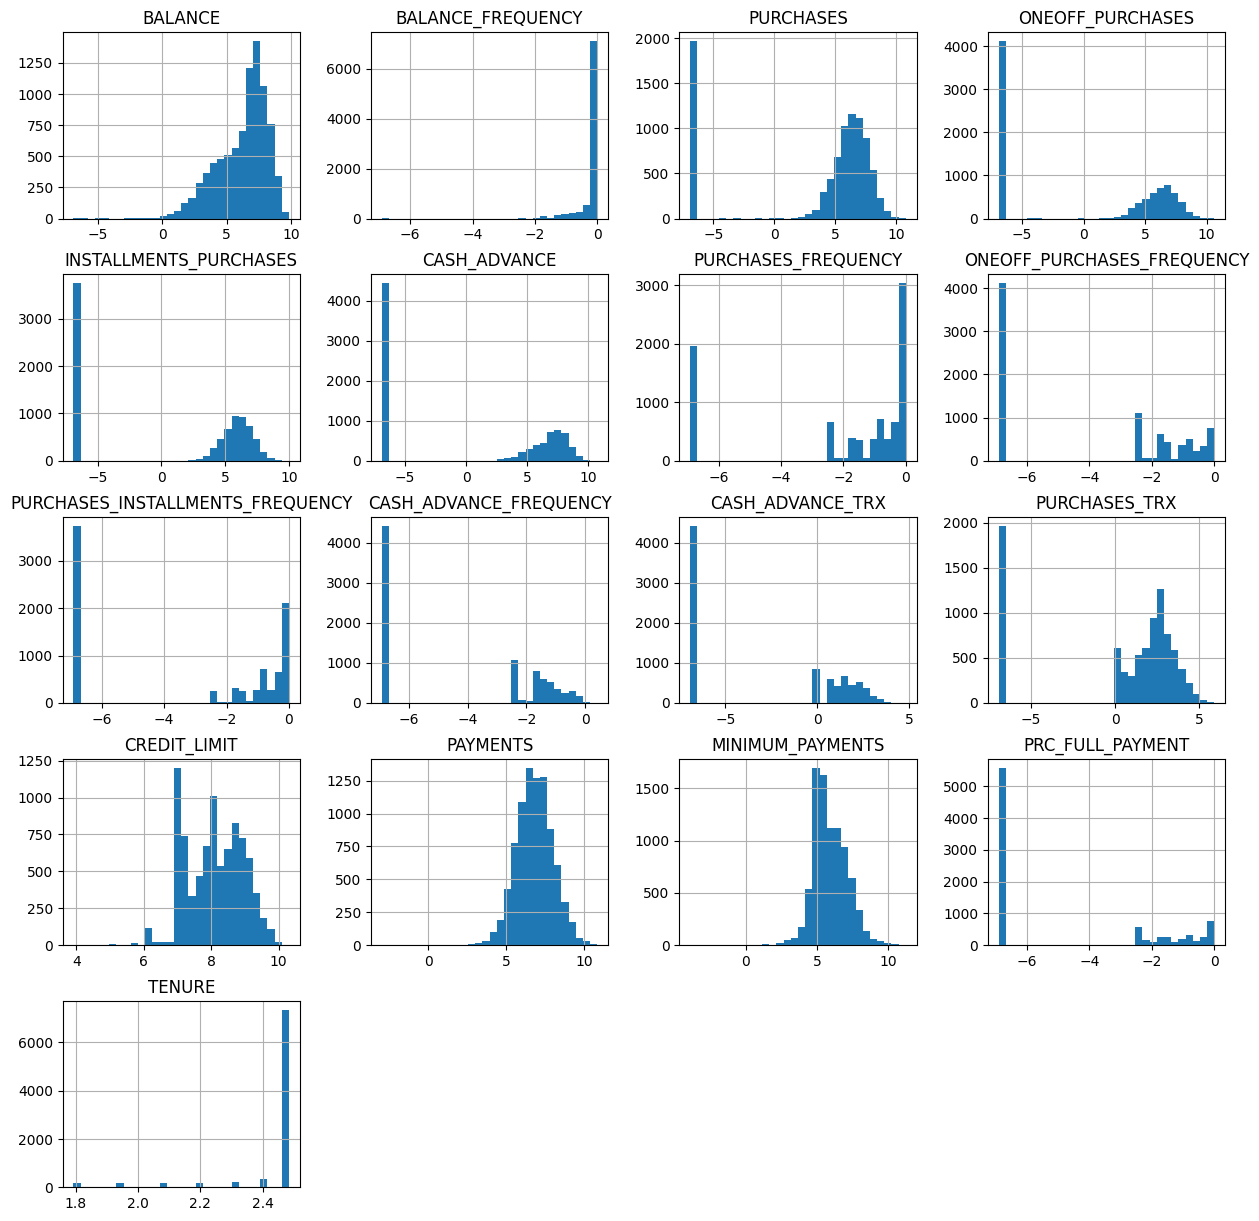

In [ ]:
df_scaled0 = np.log(df_copy +.001)
df_scaled0= pd.DataFrame(df_scaled0)
df_scaled0.hist(bins=30, figsize=(15, 15));

In [ ]:
# using Quantile transformer as it reduces the impact of (marginal) outliers

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution= 'normal', random_state=1234)
df_scaled= qt.fit_transform(df_scaled0)


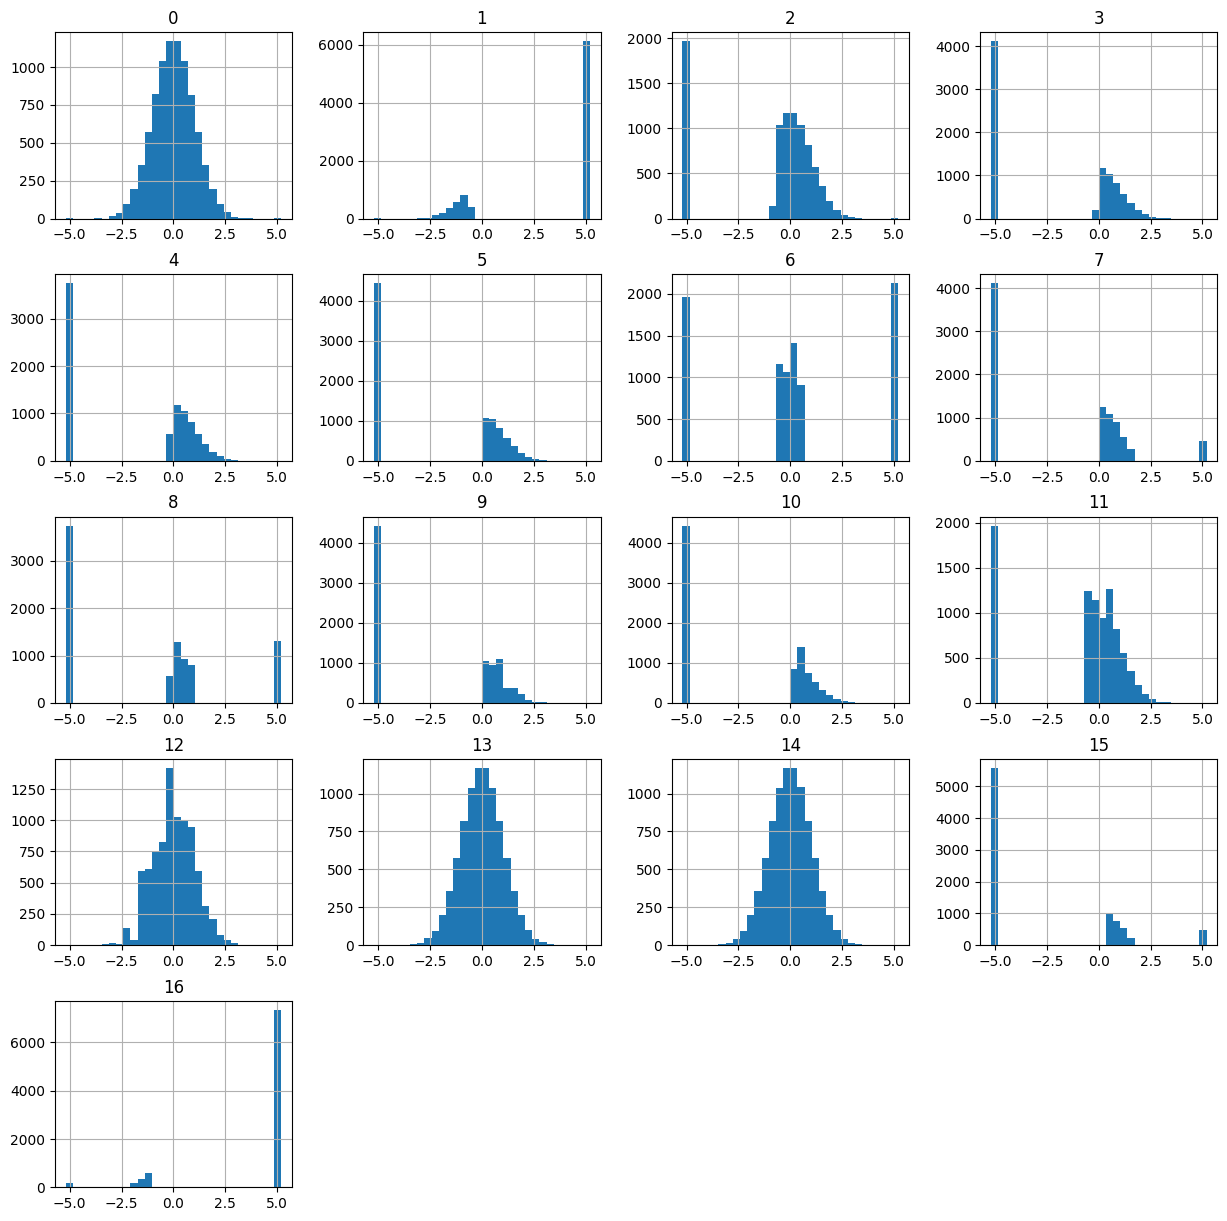

In [ ]:
df_scaled= pd. DataFrame (df_scaled)
df_scaled.hist(bins=30, figsize=(15, 15));


In [ ]:
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,-0.001174,3.347493,-0.881975,-2.077620,-1.862346,-2.268833,0.083190,-1.906012,-1.314442,-2.269428,-2.268480,-0.881884,0.002711,-0.000041,-0.000075,-2.813303,4.130675
std,1.006081,2.910490,2.434892,3.010321,2.960263,3.037211,3.589870,3.313396,3.764054,3.036336,3.038035,2.434820,0.995905,1.001565,1.001843,3.371306,2.602773
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.674610,-0.624145,-0.675013,-5.199338,-5.199338,-5.199338,-0.631785,-5.199338,-5.199338,-5.199338,-5.199338,-0.634851,-0.668987,-0.674180,-0.675126,-5.199338,5.199338
50%,-0.000522,5.199338,-0.000309,0.001209,-0.000083,-5.199338,0.018820,0.094232,-0.041413,-5.199338,-5.199338,-0.030114,-0.084155,-0.000183,0.000255,-5.199338,5.199338
75%,0.675022,5.199338,0.675495,0.675340,0.674497,0.674020,0.616541,0.723343,0.637923,0.766391,0.678433,0.686350,0.694311,0.675421,0.674673,0.686350,5.199338
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you
5- Using different techniques for scaling and comment on the result

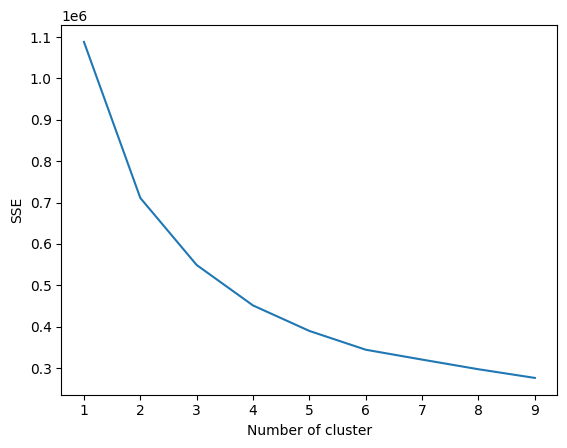

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    df_scaled.columns = df_scaled.columns.astype(str)
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    df_scaled["clusters"] = kmeans.labels_
    #print(df_scaled["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1234, n_init="auto")
kmeans.fit_predict(df_scaled)
labels= kmeans.labels_

In [ ]:
cost=[]
for i in range(1, 5):
    kmean= KMeans(i)
    kmean.fit(df_scaled)
    cost.append(kmean.inertia_)

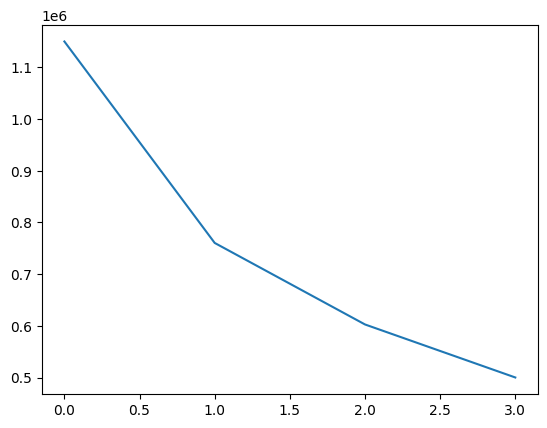

In [ ]:
plt.plot(cost)


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled, kmeans.labels_)


0.3160671457518449

In [ ]:
clusters=pd.concat([df_copy, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,4.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,4.0


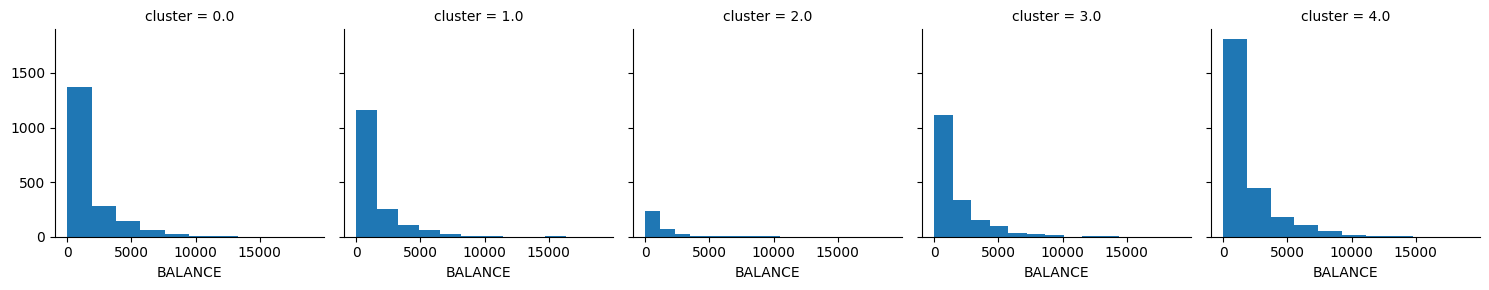

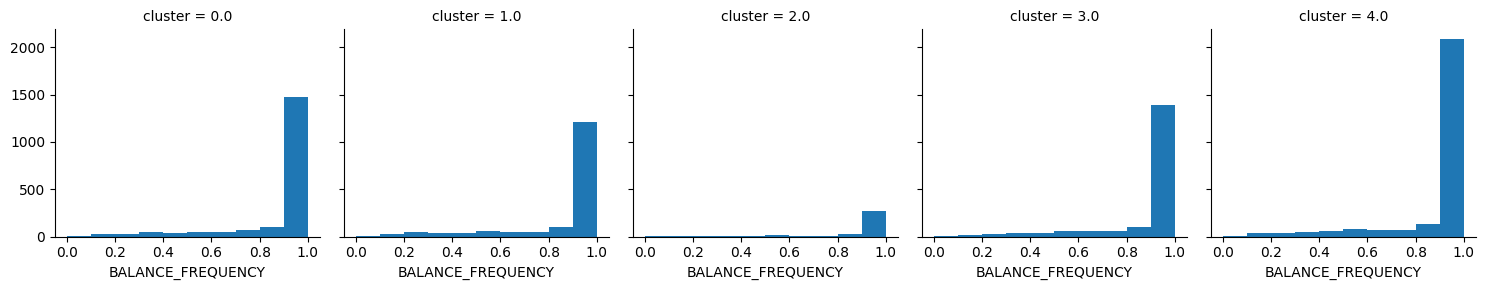

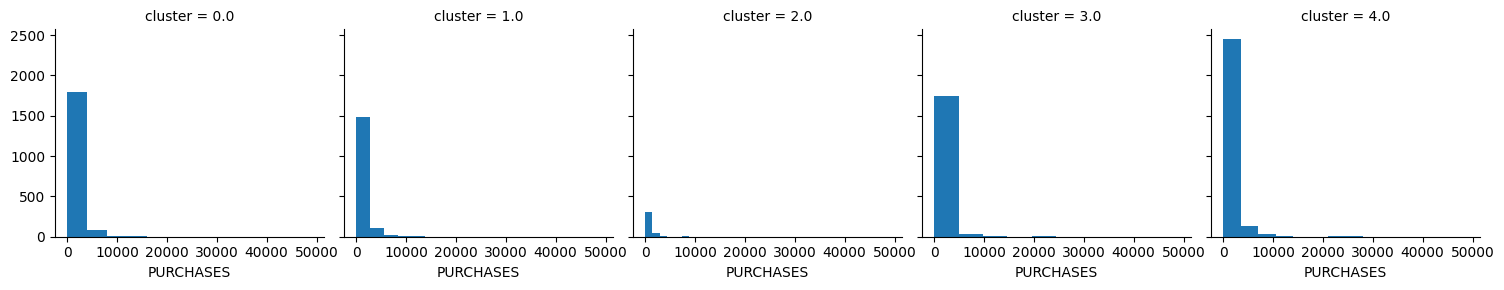

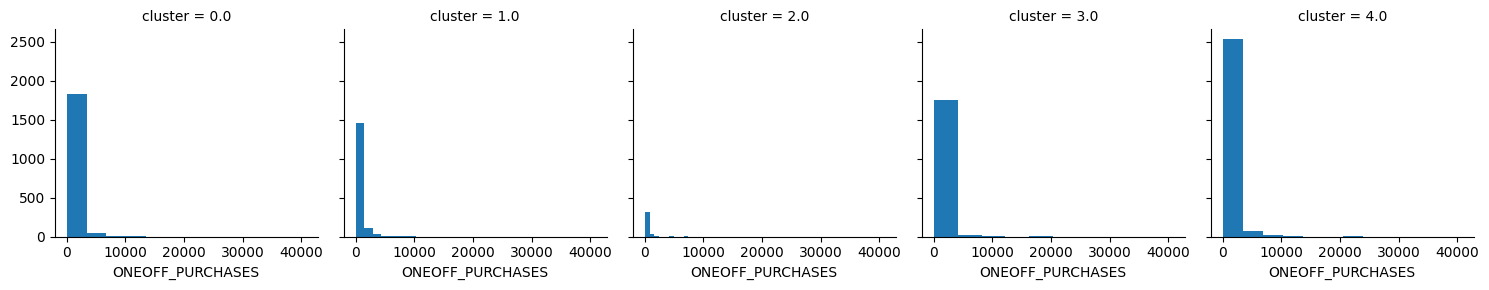

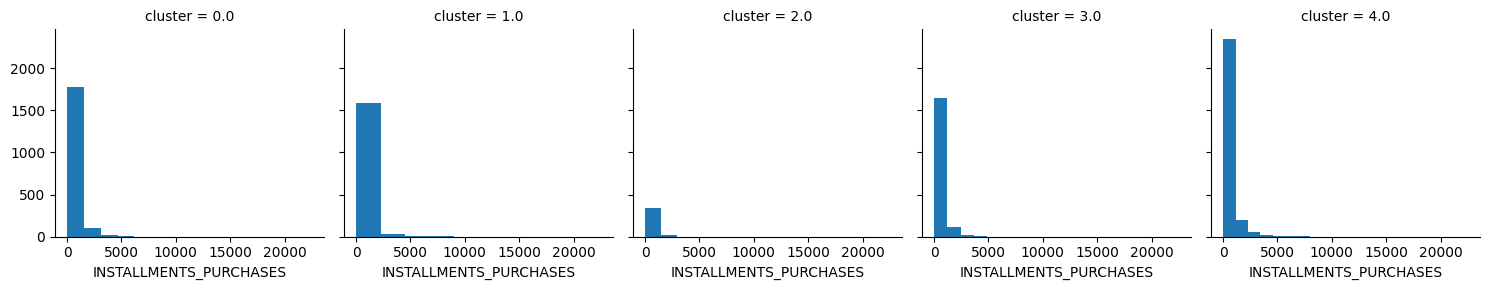

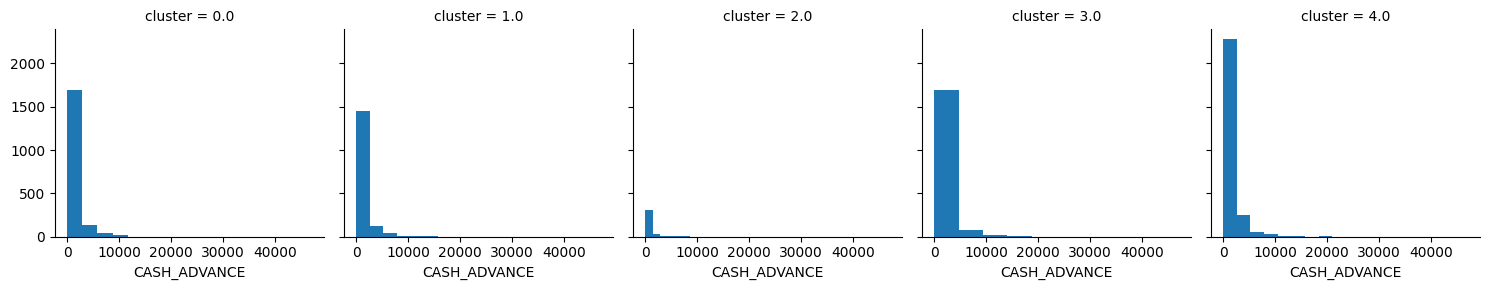

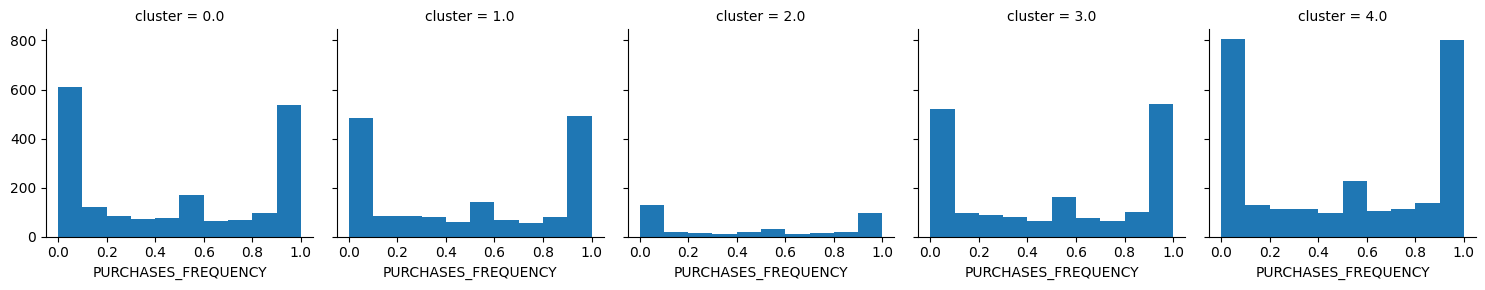

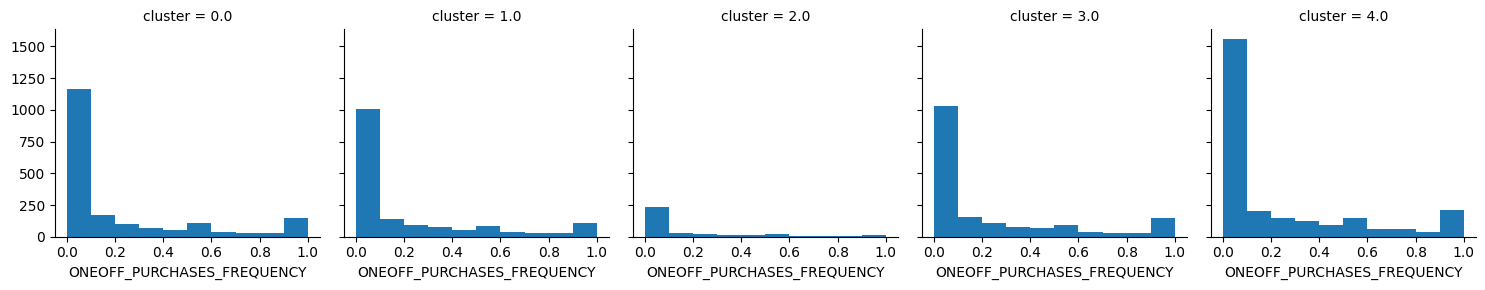

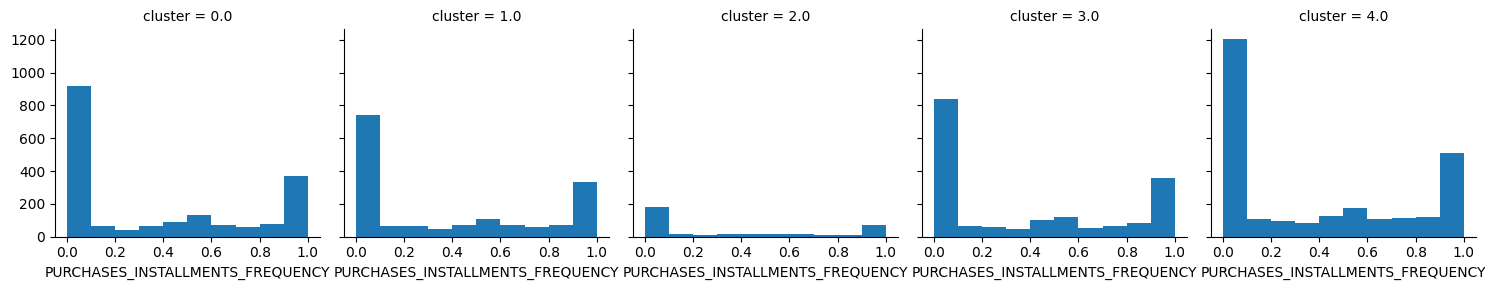

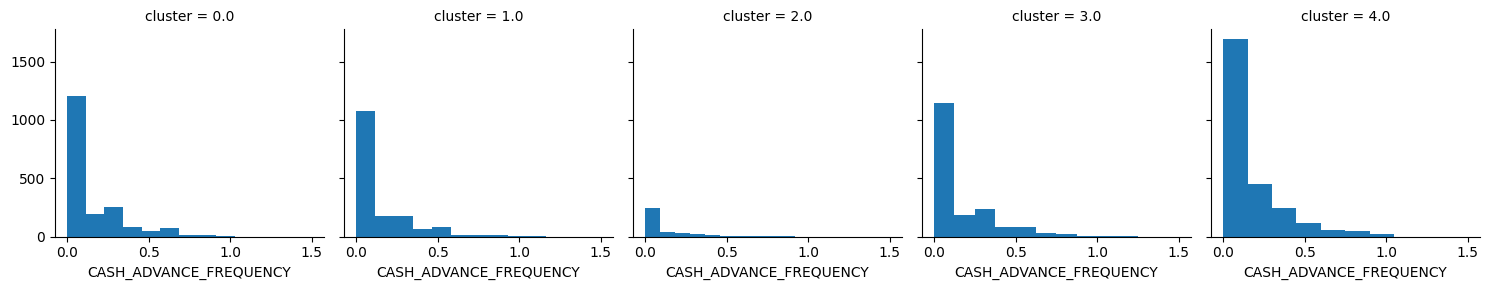

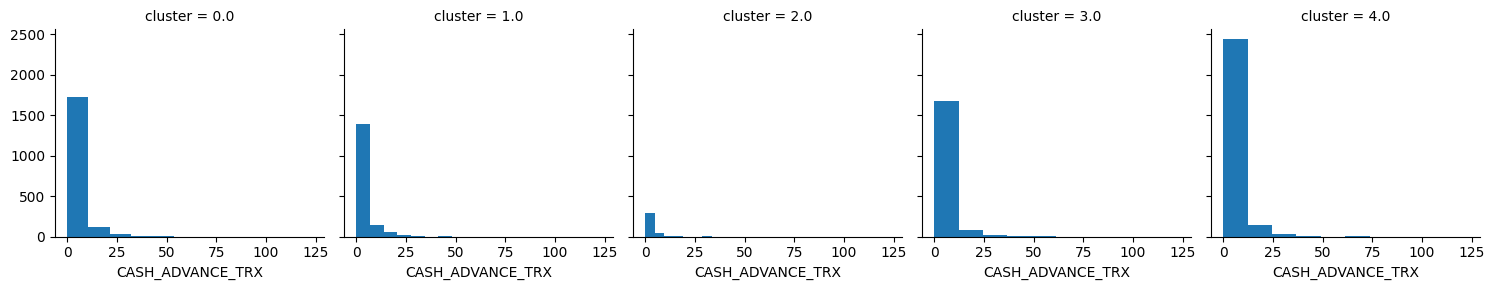

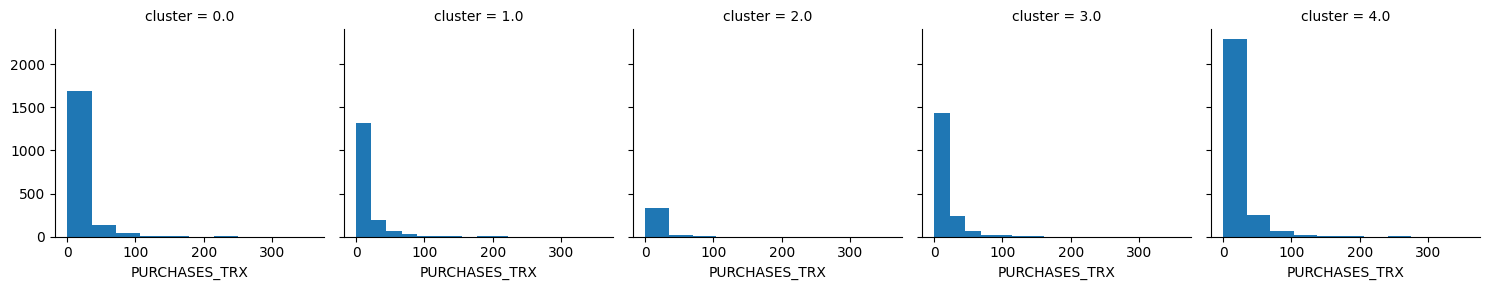

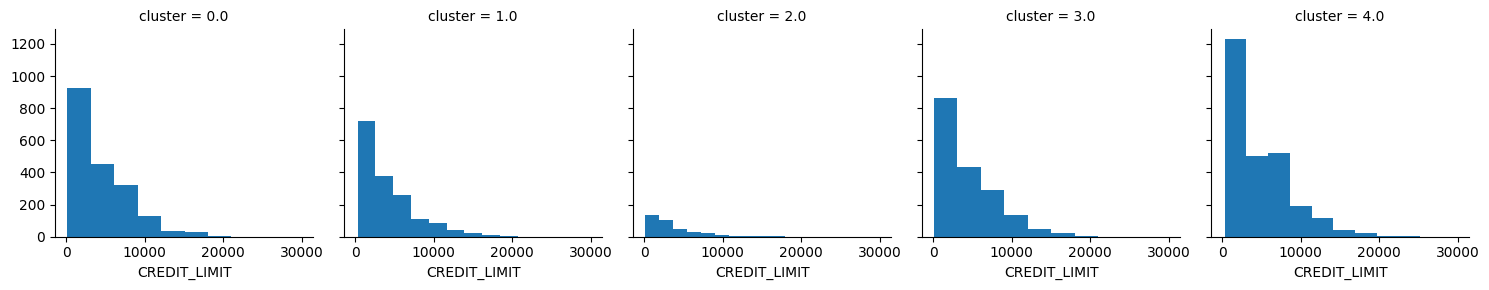

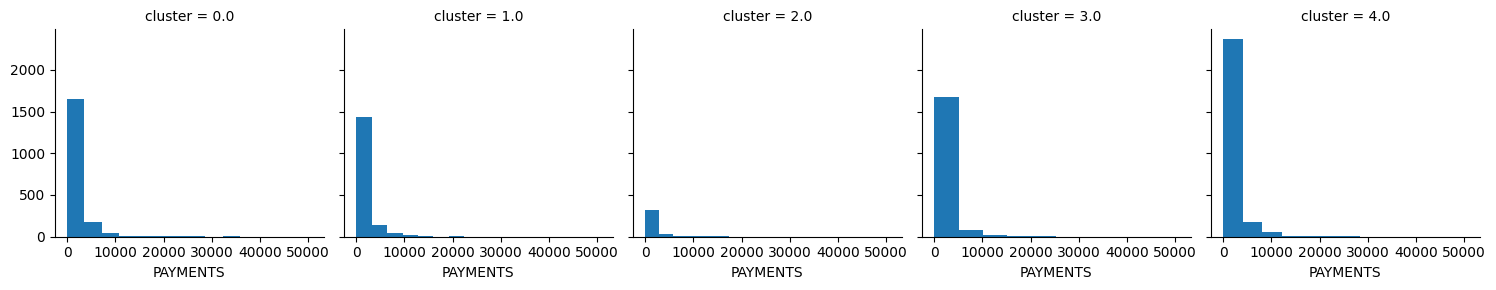

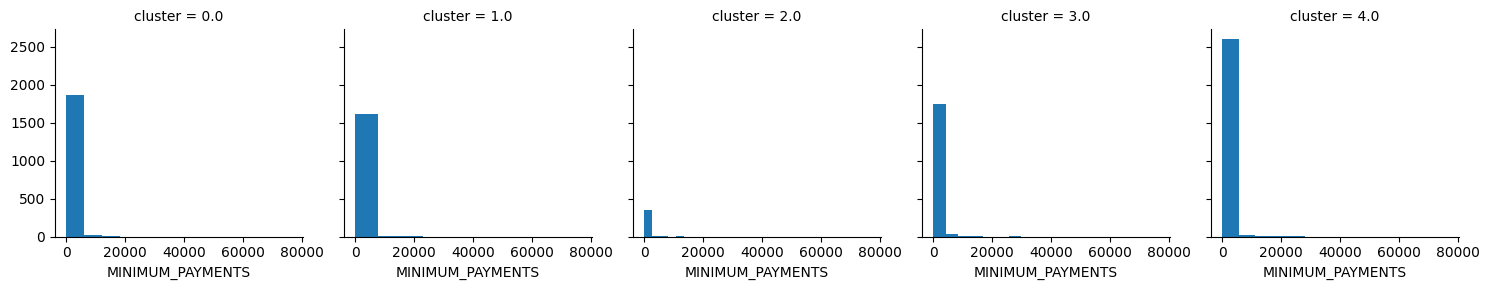

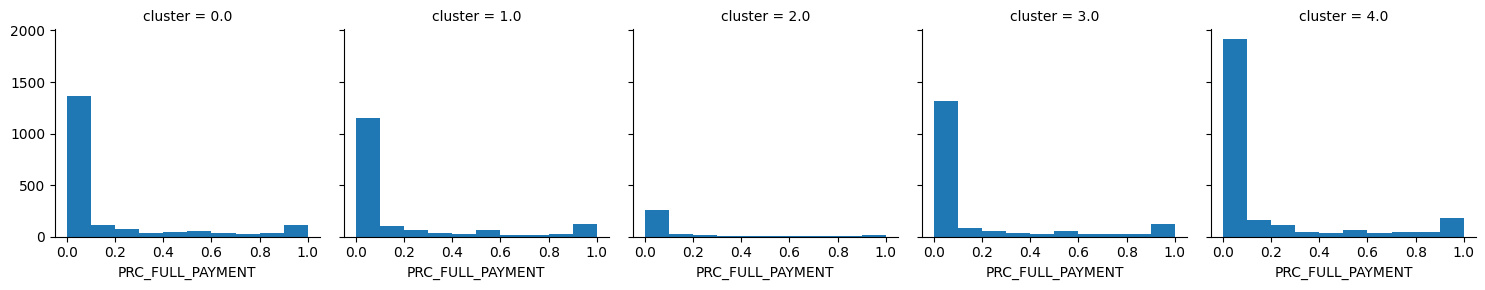

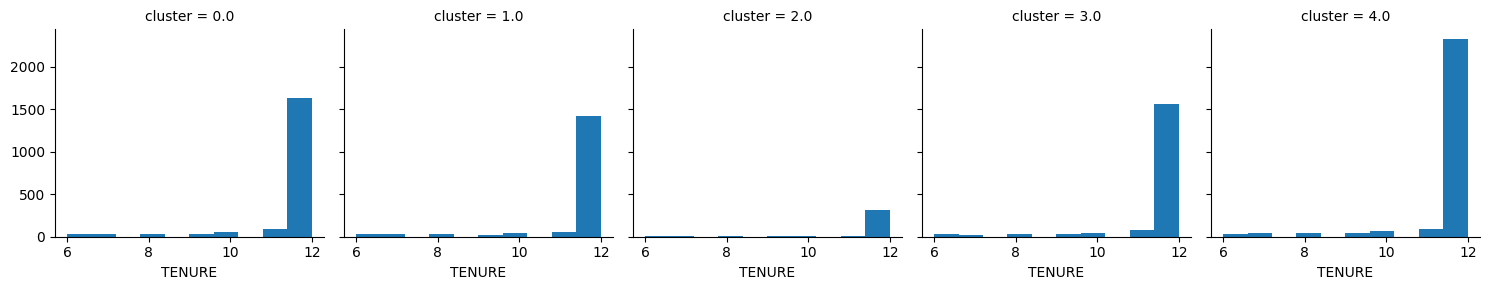

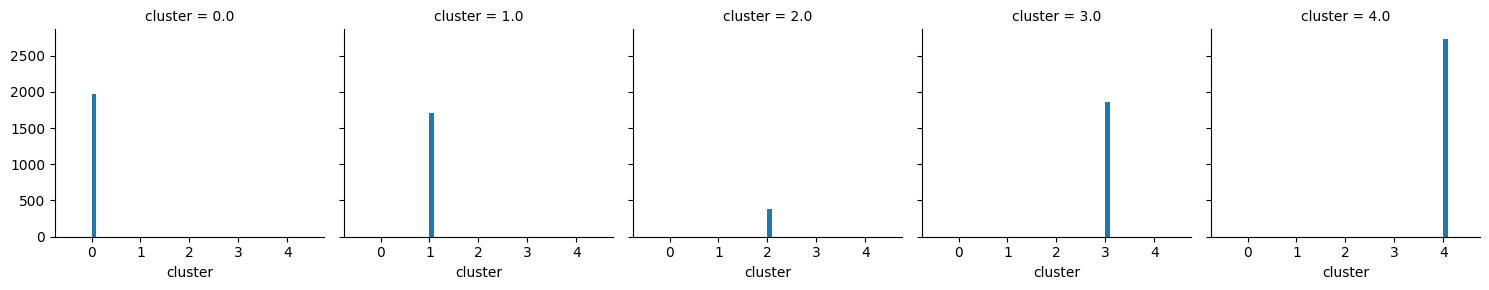

In [ ]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

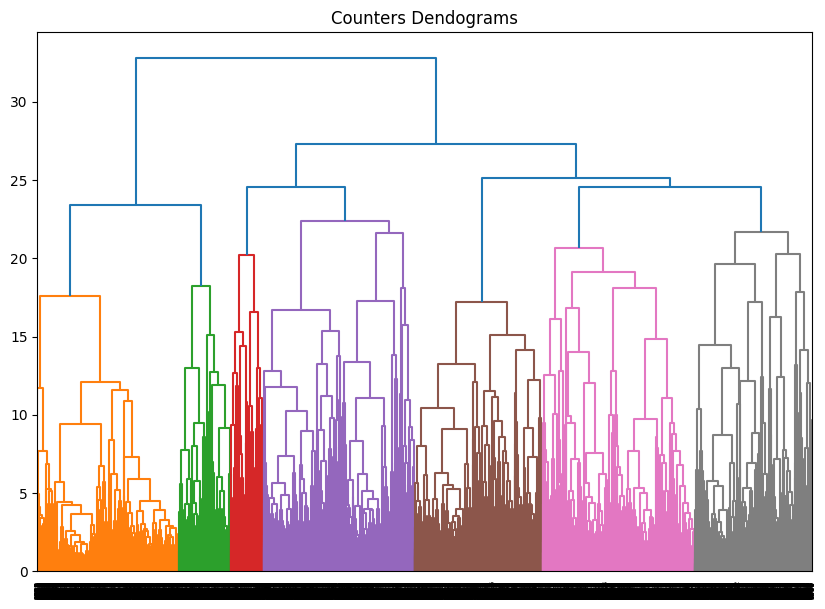

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_scaled , method= 'complete' ,metric= 'euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

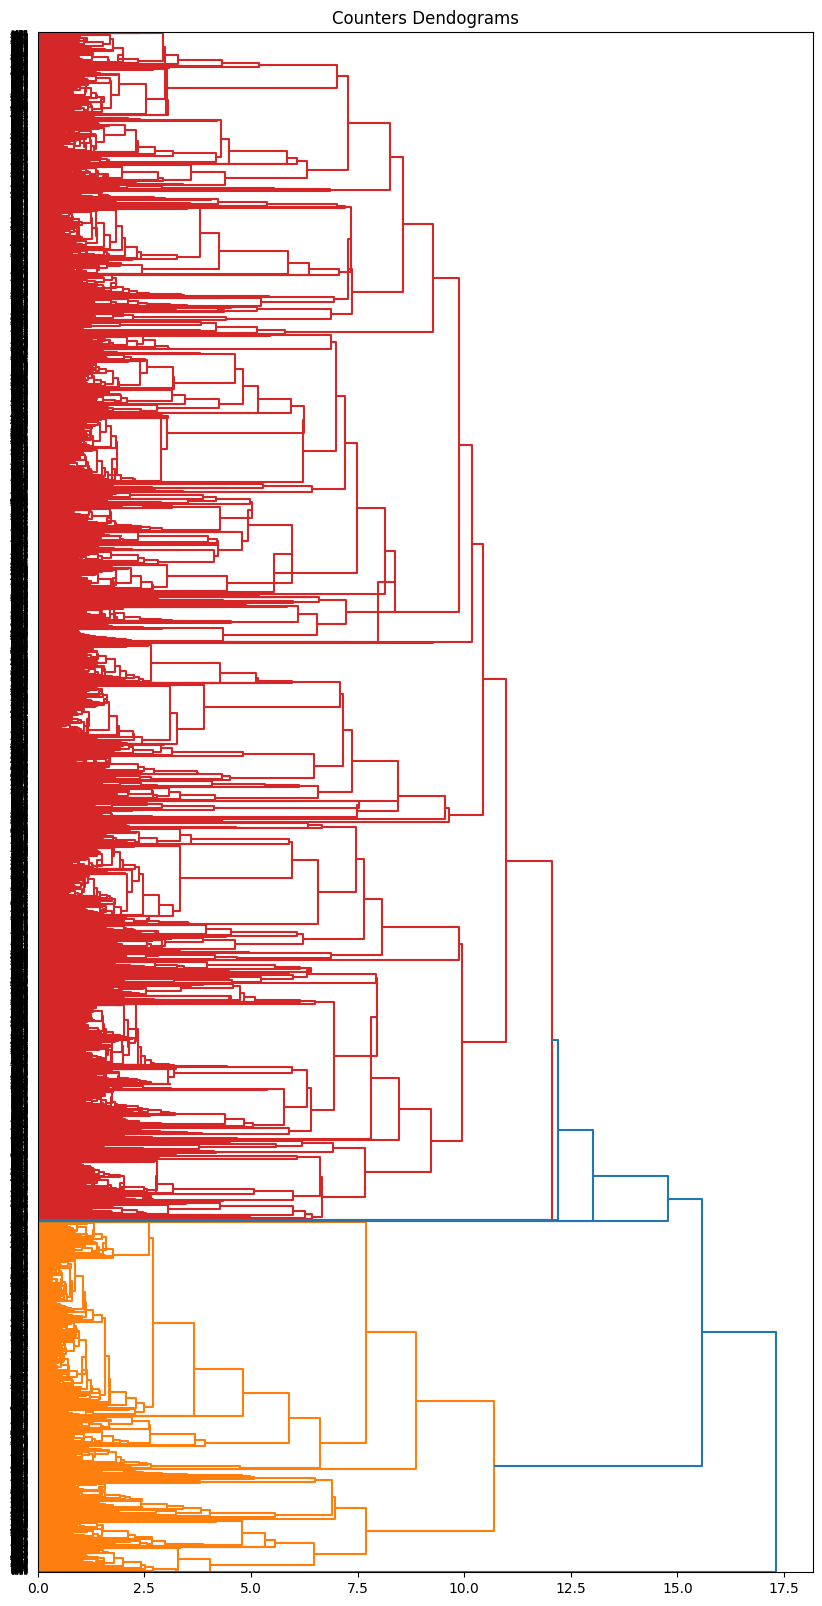

In [ ]:

plt.figure(figsize=(10, 20))
plt.title("Counters Dendograms")
dend2 = shc.dendrogram(shc.linkage(y=df_scaled , method= 'centroid' ,metric= 'euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

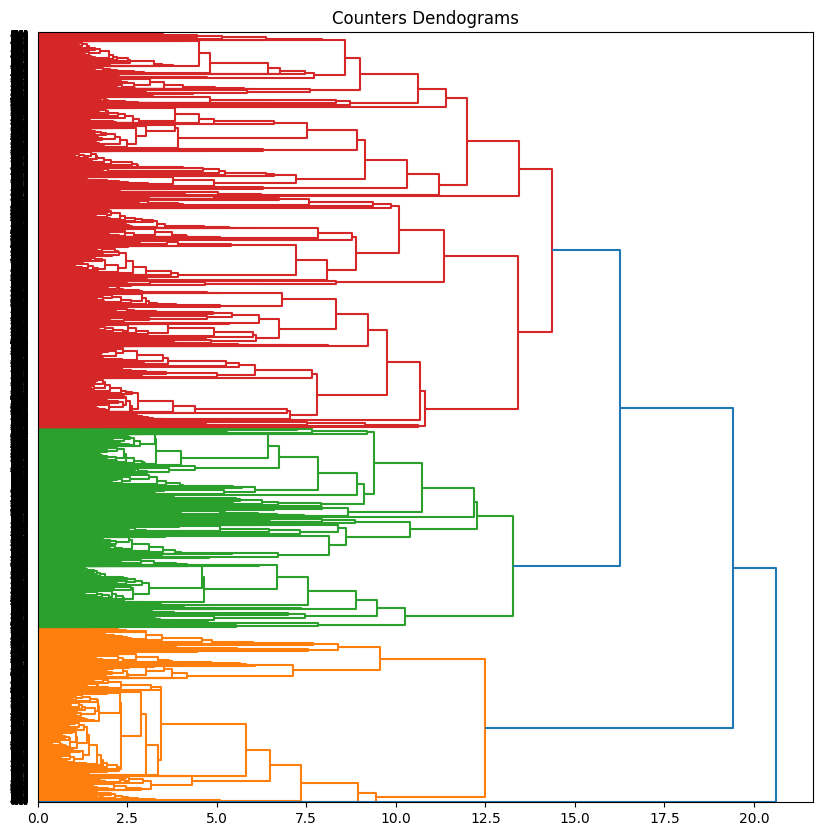

In [ ]:

plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend2 = shc.dendrogram(shc.linkage(y=df_scaled , method= 'average' ,metric= 'euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
linkage_criteria = {'ward', 'complete', 'average', 'single'}
distance_functions = {'euclidean', 'manhattan'}

In [ ]:
from sklearn.datasets import make_blobs

n_samples,n_features = df_scaled.shape
X, _ = make_blobs(n_samples=n_samples, centers=5, cluster_std=0.60, random_state=1432)


In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering

def hierarchical_clustering(linkage, distance, X):
    silhouette_scores = []
    for n_clusters in range(2, min(11, len(X))):
      if linkage == 'ward' and distance != 'euclidean':
          continue
      model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, affinity=distance)
      labels = model.fit_predict(X)
      silhouette_avg = silhouette_score(X, labels)
      silhouette_scores.append((n_clusters, silhouette_avg))
    return silhouette_scores




In [ ]:
silhouette_scores = {}
for linkage in linkage_criteria:
    for distance in distance_functions:
        scores = hierarchical_clustering(linkage, distance, X)
        silhouette_scores[(linkage, distance)] = scores


In [ ]:
for key, value in silhouette_scores.items():
    print(f"Linkage: {key[0]}, Distance: {key[1]}")
    for n_clusters, score in value:
        print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")
    print()

Linkage: complete, Distance: euclidean
Number of clusters: 2, Silhouette Score: 0.564308878454434
Number of clusters: 3, Silhouette Score: 0.6027094495290692
Number of clusters: 4, Silhouette Score: 0.6650816794812767
Number of clusters: 5, Silhouette Score: 0.5740293865069446
Number of clusters: 6, Silhouette Score: 0.45479357946042287
Number of clusters: 7, Silhouette Score: 0.3820146551794858
Number of clusters: 8, Silhouette Score: 0.3715460736476339
Number of clusters: 9, Silhouette Score: 0.26526713664438106
Number of clusters: 10, Silhouette Score: 0.28028186358547025

Linkage: complete, Distance: manhattan
Number of clusters: 2, Silhouette Score: 0.40292248796437347
Number of clusters: 3, Silhouette Score: 0.4546684276834713
Number of clusters: 4, Silhouette Score: 0.5892133525007112
Number of clusters: 5, Silhouette Score: 0.45873924507433683
Number of clusters: 6, Silhouette Score: 0.48998203782420613
Number of clusters: 7, Silhouette Score: 0.3796538054916322
Number of clust

In [ ]:
max_score = float('-inf')
max_params = None
for params, scores in silhouette_scores.items():
    for n_clusters, score in scores:
        if score > max_score:
            max_score = score
            max_params = (params[0], params[1], n_clusters)
print(f"Maximum Silhouette Score: {max_score}")
print(f"Linkage: {max_params[0]}, Distance: {max_params[1]}, Number of Clusters: {max_params[2]}")

Maximum Silhouette Score: 0.673797838129806
Linkage: ward, Distance: euclidean, Number of Clusters: 4


In [ ]:
best_linkage = max_params[0]
best_distance = max_params[1]
best_n_clusters = max_params[2]
best_linkage

'ward'

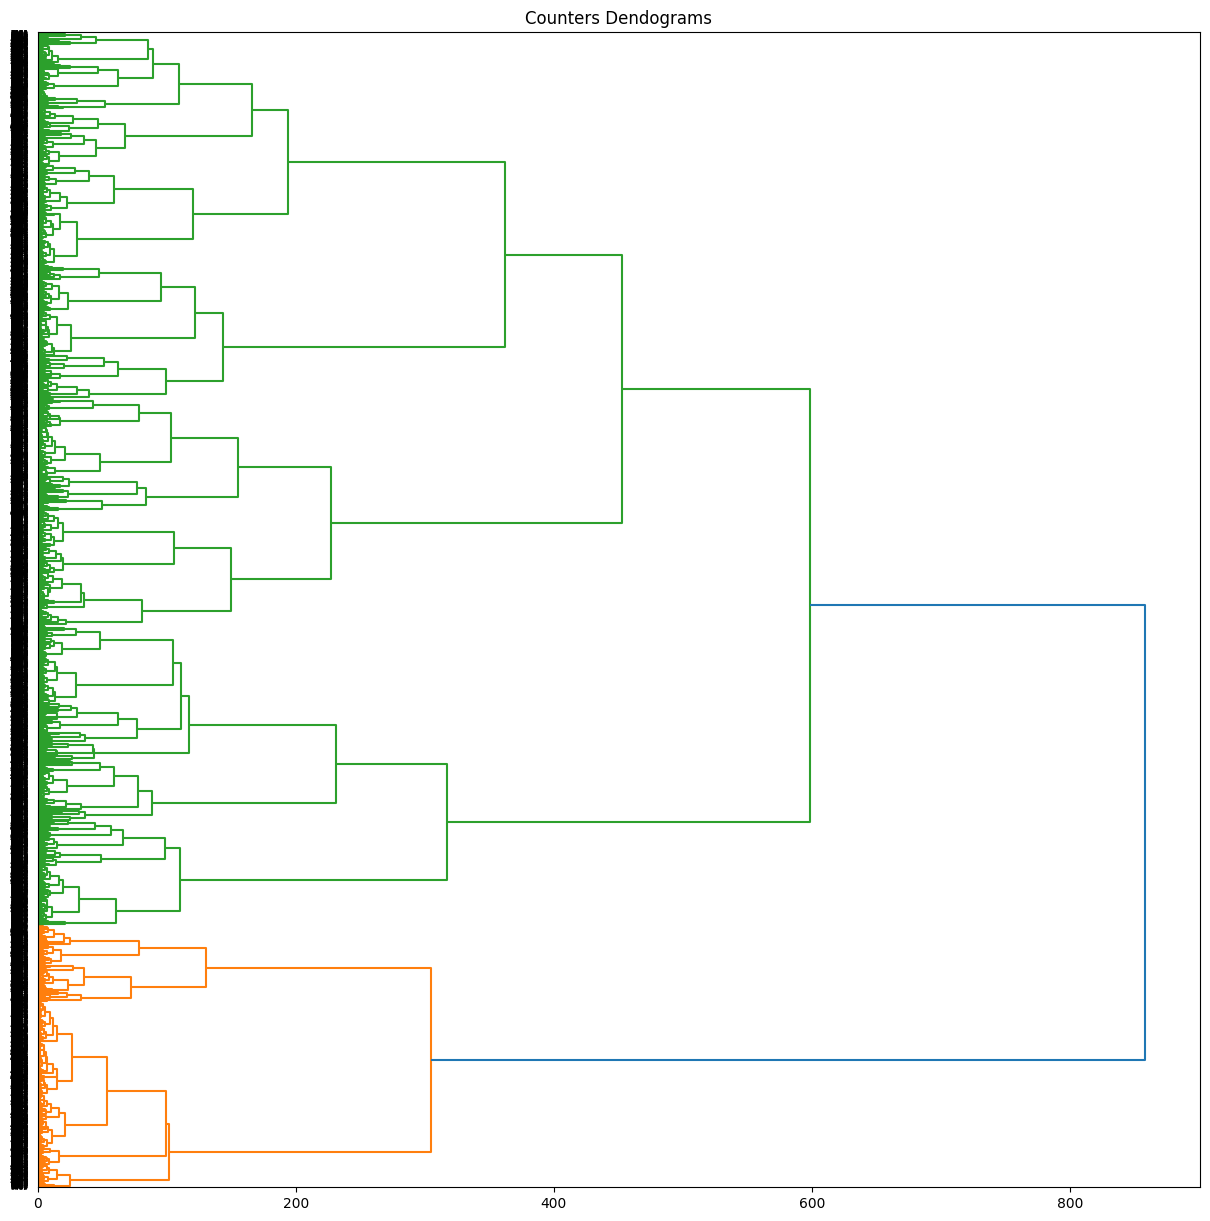

In [ ]:

best_model = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, affinity=best_distance)
best_labels = best_model.fit_predict(df_scaled)
plt.figure(figsize=(15, 15))
plt.title("Counters Dendograms")
best_dendogram = shc.dendrogram(shc.linkage(y= df_scaled , method= best_linkage ,metric= best_distance),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method

# ***Applying PCA ⚔  Kernal PCA  ***

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

train_pca = pca.fit_transform(df_scaled)
train_kernel_pca = kernel_pca.fit_transform(df_scaled)

In [ ]:
df_scaled

\*Visualization* of **PCA** and **Kernel** **PCA**

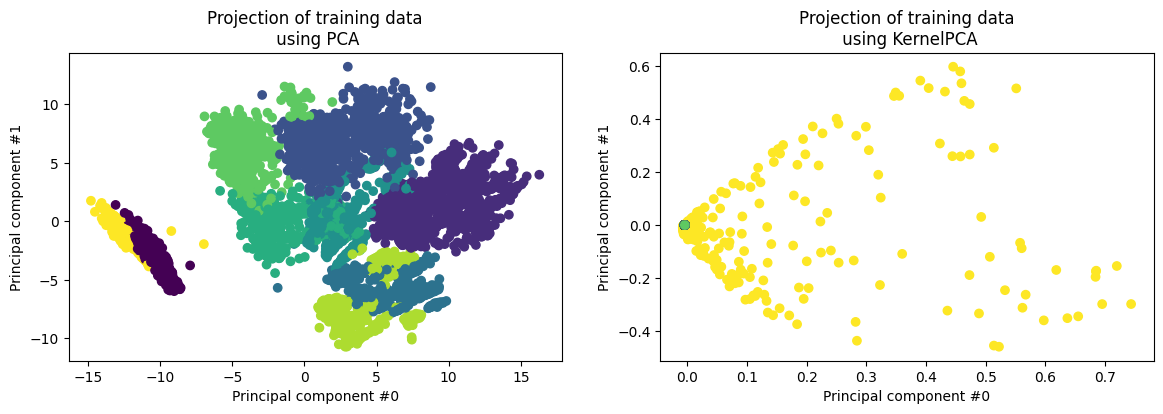

In [ ]:
fig, ( pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(14, 4)
)
pca_proj_ax.scatter(train_pca[:, 0], train_pca[:, 1], c= df_scaled['clusters'] )
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of training data\n using PCA")

kernel_pca_proj_ax.scatter(train_kernel_pca[:, 0], train_kernel_pca[:, 1], c= df_scaled['clusters'])
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of training data\n using KernelPCA")


In [ ]:
#Applying kmeans with PCA
from sklearn.cluster import KMeans
kmeans_with_pca = KMeans(n_clusters=5, random_state=1234, n_init="auto").fit(train_pca)
labels= kmeans_with_pca.labels_


In [ ]:
kmeans_with_pca

KMeans(n_clusters=5, n_init='auto', random_state=1234)

In [ ]:
silhouette_score(train_pca, kmeans_with_pca.labels_)

0.533887768355734

In [ ]:
#Applying kmeans with Kernel PCA
from sklearn.cluster import KMeans
kmeans_with_kernel_pca = KMeans(n_clusters=5, random_state=1234, n_init="auto").fit(train_kernel_pca)
labels_kernel= kmeans_with_kernel_pca.labels_
silhouette_score(train_kernel_pca, kmeans_with_kernel_pca.labels_)


0.0006369362019670142

 ☑ High score with PCA gives indication about linearity of Data ☑

---



💹 Visualization of Kmeans with tsne

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


cluster_centers = kmeans_with_pca.cluster_centers_

cluster_distances = kmeans_with_pca.transform(train_pca)

tsne = TSNE(n_components=2, random_state=1234, perplexity= 100)
X_tsne = tsne.fit_transform(cluster_distances)



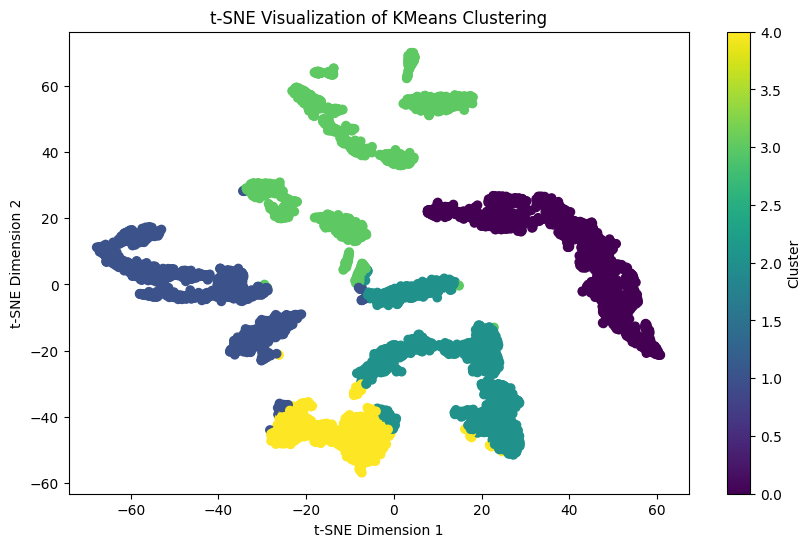

In [ ]:
#Visualize the t-SNE-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_with_pca.labels_, cmap='viridis', alpha=1)
plt.title('t-SNE Visualization of KMeans Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

◇ **DBSCAN**

In [ ]:
#Applying DBSCAN with PCA #eps=.8
from sklearn.cluster import DBSCAN

clustering_DBSCAN = DBSCAN (eps=0.7, min_samples=3)

clustering_DBSCAN.fit_predict(train_pca)
labels_dbscan= clustering_DBSCAN.labels_
silhouette_avg = silhouette_score(train_pca,labels_dbscan)
print(silhouette_avg)

0.027599880529996988


In [ ]:
#Applying DBSCAN with PCA #eps=2
from sklearn.cluster import DBSCAN

clustering_DBSCAN = DBSCAN (eps=2, min_samples=3)
clustering_DBSCAN.fit(train_pca)
labels_dbscan2= clustering_DBSCAN.labels_
silhouette_avg = silhouette_score(train_pca, labels_dbscan2)
print(silhouette_avg)

0.3229735201248451


In [ ]:
np.unique(labels_dbscan)

array([-1,  0,  1,  2,  3,  4])

In [ ]:
tsne_db = TSNE(n_components=2, random_state=1234, perplexity= 100)
X_tsne_db =  tsne_db.fit_transform (train_pca)

***💹   Visualization of DBSCAN with tsne***

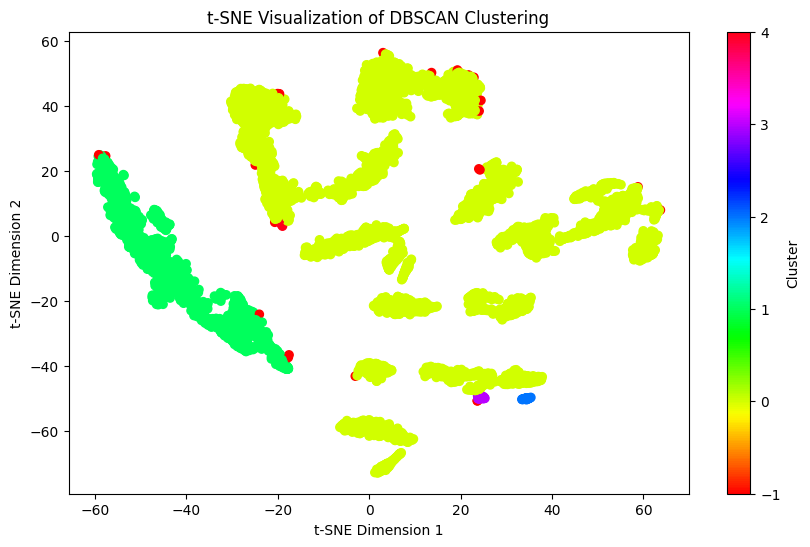

In [ ]:
#Visualize the t-SNE-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne_db[:, 0], X_tsne_db[:, 1], c= labels_dbscan, cmap='hsv')
plt.title('t-SNE Visualization of DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
##I tried to enhance this result of DBSCAN , However this is the best result i obtained

 ***⚓ EM (Expectation-Maximization) algorithm **

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=1234).fit(train_pca)
labels_gm = gm.predict(train_pca)


In [ ]:
np.unique(labels_gm)

array([0, 1])

In [ ]:
from sklearn.manifold import TSNE
cluster_centers = gm.means_
# posteriors = gm.predict_proba(df_scaled)
# cluster_centers = np.dot(posteriors.T, df_scaled) / posteriors.sum(axis=0)[:, np.newaxis]

perplexity = min(30, len(cluster_centers) - 1)

tsne = TSNE(n_components=2, random_state=1234, perplexity= perplexity)
X_tsne = tsne.fit_transform(cluster_centers)


In [ ]:
tsne = TSNE(n_components=2, random_state=1234)
X_tsne_data = tsne.fit_transform(train_pca)


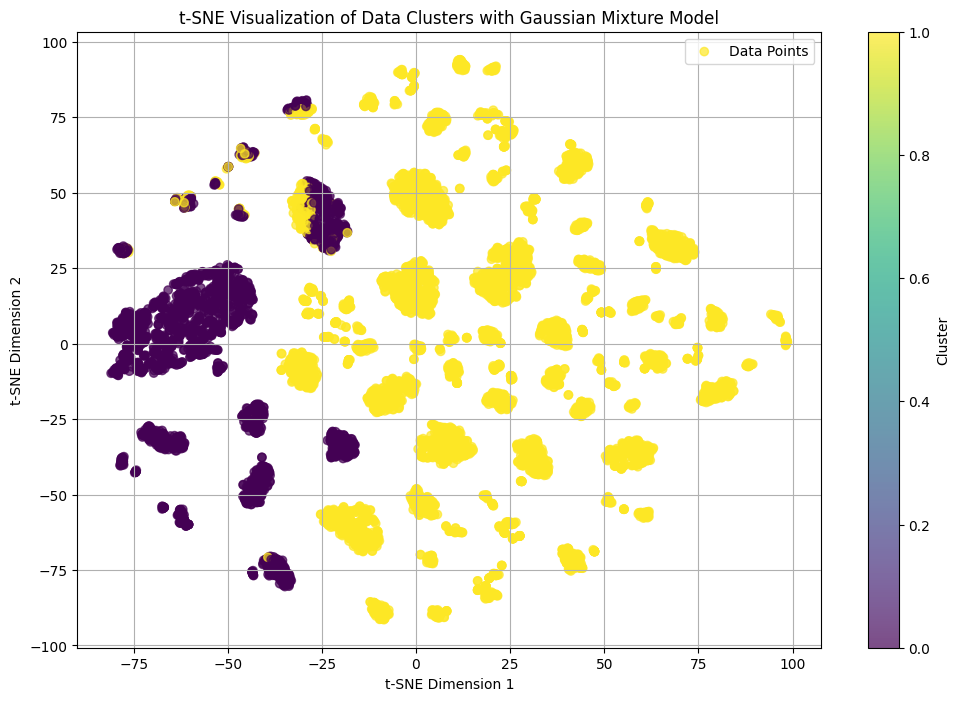

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne_data[:, 0], X_tsne_data[:, 1], c= gm.predict(train_pca), cmap='viridis', alpha=0.7, label='Data Points')
plt.title('t-SNE Visualization of Data Clusters with Gaussian Mixture Model')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()